### TASK 2 : Experimentation and uplift testing
Extend your analysis from Task 1 to help you identify benchmark stores that allow you to test the impact of the trial store layouts on customer sales.

#### Here is the background information on your task
You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, has asked us to test the impact of the new trial layouts with a data driven recommendation to whether or not the trial layout should be rolled out to all their stores.

You have received the following email from Zilinka.

'Hi, 

Thanks for your feedback earlier, I’m glad you find my follow up emails helpful in ensuring your on the right track.

For this part of the project we will be examining the performance in trial vs control stores to provide a recommendation for each location based on our insight. Below are some of the areas I want you to focus on, of course if you discover any other interesting insights feel free to include them in your findings.

Select control stores – explore the data and define metrics for your control store selection – think about what would make them a control store. Look at the drivers and make sure you visualise these in a graph to better determine if they are suited. For this piece it may even be worth creating a function to help you. 

Assessment of the trial – this one should give you some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. We want to know if the trial stores were successful or not. 

Collate findings – summarise your findings for each store and provide an recommendation that we can share with Julia outlining the impact on sales during the trial period.

Remember when working with a client visualisations are key to helping them understand the data. Be sure to save all your visualisations so we can use them later in our report. We are presenting to our client in 3 weeks so if you could submit your analysis by mid next week that will give us great amount of time to discuss findings and pull together the report.

Keep up the good work!

Thanks, 

Zilinka'

#### Here is your task

Julia has asked us to evaluate the performance of a store trial which was performed in stores 77, 86 and 88.

We have chosen to complete this task in R, however you will also find Python to be a useful tool in this piece of analytics. We have also provided an R solution template if you want some assistance in getting through this Task.

To get started use the QVI_data dataset below or your output from task 1 and consider the monthly sales experience of each store.

This can be broken down by:

 - total sales revenue
 - total number of customers
 - average number of transactions per customer

Create a measure to compare different control stores to each of the trial stores to do this write a function to reduce having to re-do the analysis for each trial store. Consider using Pearson correlations or a metric such as a magnitude distance e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure.

Once you have selected your control stores, compare each trial and control pair during the trial period. You want to test if total sales are significantly different in the trial period and if so, check if the driver of change is more purchasing customers or more purchases per customers etc.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set working directory
import io
%cd "E:\FORAGE\Quantium\Task 2 - Experimentation and uplift testing"

e:\FORAGE\Quantium\Task 2 - Experimentation and uplift testing


In [3]:
data = pd.read_csv("final_data.csv")

In [4]:
data.head()

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,NET_WEIGHT,YEAR,MONTH,DAY
0,0,2018-07-01,104,104138,104566,101,Doritos Salsa Medium 300g,2,5.2,OLDER SINGLES/COUPLES,Premium,300g,2018,July,Sunday
1,1,2018-07-01,194,194349,194710,7,Smiths Crinkle Original 330g,2,11.4,OLDER SINGLES/COUPLES,Premium,330g,2018,July,Sunday
2,2,2018-07-01,19,19009,15816,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,RETIREES,Budget,330g,2018,July,Sunday
3,3,2018-07-01,104,104092,104274,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,OLDER SINGLES/COUPLES,Mainstream,300g,2018,July,Sunday
4,4,2018-07-01,179,179213,180682,32,Kettle Sea Salt And Vinegar 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,2018,July,Sunday


In [5]:
data.shape

(234166, 15)

In [6]:
data.dtypes

Unnamed: 0            int64
DATE                 object
STORE_NBR             int64
LYLTY_CARD_NBR        int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
LIFESTAGE            object
PREMIUM_CUSTOMER     object
NET_WEIGHT           object
YEAR                  int64
MONTH                object
DAY                  object
dtype: object

In [7]:
data.describe()

,Unnamed: 0,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,YEAR
count,234166.000000,234166.000000,2.341660e+05,2.341660e+05,234166.000000,234166.000000,234166.000000,234166.000000
mean,117082.500000,135.141062,1.356205e+05,1.352218e+05,55.292143,1.907822,7.313453,2018.495302
std,67598.045905,76.784281,8.067789e+04,7.815065e+04,33.110960,0.672750,3.097677,0.499979
min,0.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,2018.000000
25%,58541.250000,70.000000,7.003400e+04,6.768925e+04,27.000000,2.000000,5.800000,2018.000000
50%,117082.500000,130.000000,1.303895e+05,1.352850e+05,52.000000,2.000000,7.400000,2018.000000
75%,175623.750000,203.000000,2.031210e+05,2.027888e+05,84.000000,2.000000,8.800000,2019.000000
max,234165.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,2019.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234166 entries, 0 to 234165
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        234166 non-null  int64  
 1   DATE              234166 non-null  object 
 2   STORE_NBR         234166 non-null  int64  
 3   LYLTY_CARD_NBR    234166 non-null  int64  
 4   TXN_ID            234166 non-null  int64  
 5   PROD_NBR          234166 non-null  int64  
 6   PROD_NAME         234166 non-null  object 
 7   PROD_QTY          234166 non-null  int64  
 8   TOT_SALES         234166 non-null  float64
 9   LIFESTAGE         234166 non-null  object 
 10  PREMIUM_CUSTOMER  234166 non-null  object 
 11  NET_WEIGHT        234166 non-null  object 
 12  YEAR              234166 non-null  int64  
 13  MONTH             234166 non-null  object 
 14  DAY               234166 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 26.8+ MB


In [9]:
# check for null values
data.isnull().sum()

Unnamed: 0          0
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
NET_WEIGHT          0
YEAR                0
MONTH               0
DAY                 0
dtype: int64

In [10]:
# check for duplicates
data.duplicated().sum()

0

In [11]:
data = data.drop(['Unnamed: 0'],axis=1)

In [12]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,NET_WEIGHT,YEAR,MONTH,DAY
0,2018-07-01,104,104138,104566,101,Doritos Salsa Medium 300g,2,5.2,OLDER SINGLES/COUPLES,Premium,300g,2018,July,Sunday
1,2018-07-01,194,194349,194710,7,Smiths Crinkle Original 330g,2,11.4,OLDER SINGLES/COUPLES,Premium,330g,2018,July,Sunday
2,2018-07-01,19,19009,15816,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,RETIREES,Budget,330g,2018,July,Sunday
3,2018-07-01,104,104092,104274,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,OLDER SINGLES/COUPLES,Mainstream,300g,2018,July,Sunday
4,2018-07-01,179,179213,180682,32,Kettle Sea Salt And Vinegar 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,2018,July,Sunday


#### Total Sales Revenue

In [13]:
total_sales = sum(data['TOT_SALES'])
print("The Total Sales Revenue is:",round(total_sales,2))

The Total Sales Revenue is: 1712562.1


#### Total Number of Customers

In [14]:
total_customers = len(data['LYLTY_CARD_NBR'].unique())
print("Total Number of Customers :",total_customers)

Total Number of Customers : 70367


#### Average Number of Transactions Per Customer

In [15]:
avg_tran_per_cust = round(data.shape[0] / total_customers,2)
print('Average Number of Transactions Per Customer :', avg_tran_per_cust)

Average Number of Transactions Per Customer : 3.33


In [16]:
data['YEARMONTH'] = [''.join(x.split('-')[0:2]) for x in data.DATE]
data['YEARMONTH'] = pd.to_numeric(data['YEARMONTH'])
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,NET_WEIGHT,YEAR,MONTH,DAY,YEARMONTH
0,2018-07-01,104,104138,104566,101,Doritos Salsa Medium 300g,2,5.2,OLDER SINGLES/COUPLES,Premium,300g,2018,July,Sunday,201807
1,2018-07-01,194,194349,194710,7,Smiths Crinkle Original 330g,2,11.4,OLDER SINGLES/COUPLES,Premium,330g,2018,July,Sunday,201807
2,2018-07-01,19,19009,15816,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,RETIREES,Budget,330g,2018,July,Sunday,201807
3,2018-07-01,104,104092,104274,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,OLDER SINGLES/COUPLES,Mainstream,300g,2018,July,Sunday,201807
4,2018-07-01,179,179213,180682,32,Kettle Sea Salt And Vinegar 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,2018,July,Sunday,201807


#### Monthly Sales of Each Store
 - Monthly overall sales revenue
 - Monthly number of customers
 - Monthly number of transactions per customer

In [17]:
metrics=data.groupby(['STORE_NBR','YEARMONTH']).agg({'TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique','TXN_ID':'nunique','PROD_QTY':'sum'})
metrics['PRICE_PER_UNIT']=metrics['TOT_SALES']/metrics['PROD_QTY']
metrics['CHIP_PER_TXN']=metrics['PROD_QTY']/metrics['TXN_ID']
metrics=metrics.rename(columns={'LYLTY_CARD_NBR':'CUSTOMERS'})
metrics['TXN_PER_CUST']=metrics['TXN_ID']/metrics['CUSTOMERS']
metrics.drop(['TXN_ID'],axis=1,inplace=True)

In [18]:
full=metrics.copy()

In [19]:
#taking data before 2019-02 into consideration
trial=[]
for i in metrics.index:
    if(i[1]>=201902):
        if(i[1]<=201904):
            trial.append(metrics.loc[i])
        metrics.drop(i,inplace=True)
trial=pd.DataFrame(trial)

In [20]:
#taking data after 2019-02 into trial dataframe
trial.index.name=('IDX')
k=0
trial['STORE_NBR']=0
trial['MONTHYEAR']=0
for (i,j) in trial.index:
    trial['STORE_NBR'].iloc[k]=i
    trial['MONTHYEAR'].iloc[k]=j 
    k=k+1
trial=trial.set_index(['STORE_NBR','MONTHYEAR'])

In [21]:
trial

TOT_SALES  CUSTOMERS  PROD_QTY  PRICE_PER_UNIT  \
STORE_NBR MONTHYEAR                                                   
1         201902         167.2       42.0      50.0        3.344000   
          201903         170.6       39.0      52.0        3.280769   
          201904         174.7       37.0      52.0        3.359615   
2         201902         133.7       28.0      36.0        3.713889   
          201903         173.3       38.0      46.0        3.767391   
...                        ...        ...       ...             ...   
271       201903         604.4       68.0     168.0        3.597619   
          201904         679.0       76.0     188.0        3.611702   
272       201902         357.3       40.0      82.0        4.357317   
          201903         404.3       47.0      93.0        4.347312   
          201904         424.5       51.0     100.0        4.245000   

                     CHIP_PER_TXN  TXN_PER_CUST  
STORE_NBR MONTHYEAR                              
1         201902         1.136364      1.047619  
          201903         1.209302      1.102564  
          201904         1.368421      1.027027  
2         201902         1.161290      1.107143  
          201903         1.121951      1.078947  
...                           ...           ...  
271       201903         2.000000      1.235294  
          201904         2.000000      1.236842  
272       201902         1.906977      1.075000  
          201903         1.897959      1.042553  
          201904         1.923077      1.019608  

[793 rows x 6 columns]

In [22]:
metrics

TOT_SALES  CUSTOMERS  PROD_QTY  PRICE_PER_UNIT  \
STORE_NBR YEARMONTH                                                   
1         201807         176.2         44        54        3.262963   
          201808         140.8         36        45        3.128889   
          201809         251.4         55        67        3.752239   
          201810         169.4         38        49        3.457143   
          201811         174.4         41        52        3.353846   
...                        ...        ...       ...             ...   
272       201809         249.1         26        59        4.222034   
          201810         373.1         38        87        4.288506   
          201811         324.9         36        76        4.275000   
          201812         357.3         42        80        4.466250   
          201901         359.9         40        83        4.336145   

                     CHIP_PER_TXN  TXN_PER_CUST  
STORE_NBR YEARMONTH                              
1         201807         1.173913      1.045455  
          201808         1.250000      1.000000  
          201809         1.175439      1.036364  
          201810         1.256410      1.026316  
          201811         1.238095      1.024390  
...                           ...           ...  
272       201809         1.966667      1.153846  
          201810         2.023256      1.131579  
          201811         1.948718      1.083333  
          201812         1.904762      1.000000  
          201901         1.930233      1.075000  

[1847 rows x 6 columns]

#### Funtions to find correlation and magnitude of any store wih another store

In [23]:
def calcCorr(store):
    '''
    input=store number which is to be compared
    output=dataframe with corelation coefficient values
    '''
    a=[]
    metrix=metrics[['TOT_SALES','CUSTOMERS']]#add metrics as required e.g. ,'TXN_PER_CUST'
    for i in metrix.index:
        a.append(metrix.loc[store].corrwith(metrix.loc[i[0]]))
    df= pd.DataFrame(a)
    df.index=metrix.index
    df=df.drop_duplicates()
    df.index=[s[0] for s in df.index]
    df.index.name="STORE_NBR"
    return df

In [24]:
def standardizer(df):
    '''
    input=dataframe with metrics
    output=dataframe with mean of the metrics in a new column
    '''
    df=df.abs()
    df['MAGNITUDE']=df.mean(axis=1)
    return df

#### Store 77
Finding stores corelated to store 77

In [25]:
corr77=calcCorr(77)

In [26]:
corr77.head(3)

,TOT_SALES,CUSTOMERS
STORE_NBR,,
1,-0.007362,0.365844
2,-0.178074,-0.156968
3,0.675972,0.703006


In [27]:
corr77=standardizer(corr77)
corr77

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
1,0.007362,0.365844,0.186603
2,0.178074,0.156968,0.167521
3,0.675972,0.703006,0.689489
4,0.370392,0.375535,0.372964
5,0.193252,0.227586,0.210419
...,...,...,...
268,0.096202,0.146211,0.121207
269,0.688037,0.435447,0.561742
270,0.538326,0.019156,0.278741


In [28]:
corr77=corr77.sort_values(['MAGNITUDE'],ascending=False).dropna()
corr77

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
77,1.000000,1.000000,1.000000
233,0.951581,0.974398,0.962990
119,0.919691,0.982779,0.951235
41,0.807630,0.937550,0.872590
71,0.800356,0.792391,0.796374
...,...,...,...
188,0.093507,0.001688,0.047598
99,0.082478,0.010326,0.046402
170,0.060855,0.028551,0.044703


Above data shows that stores 233,119,41 are the most correlated to store 77

Selecting 233 as control store as it has max correlation

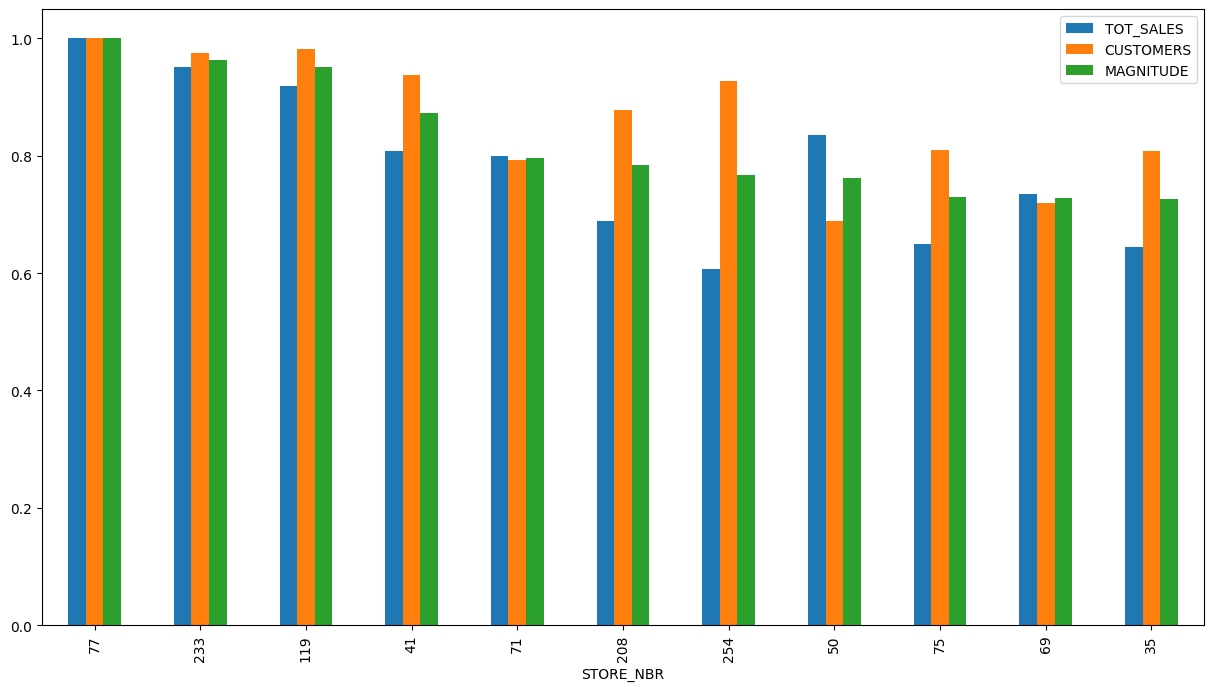

In [29]:
#Taking 0.7 as threshold corelation
corr77[(corr77.MAGNITUDE.abs()>0.7)].plot(kind='bar',figsize=(15,8))
plt.show()

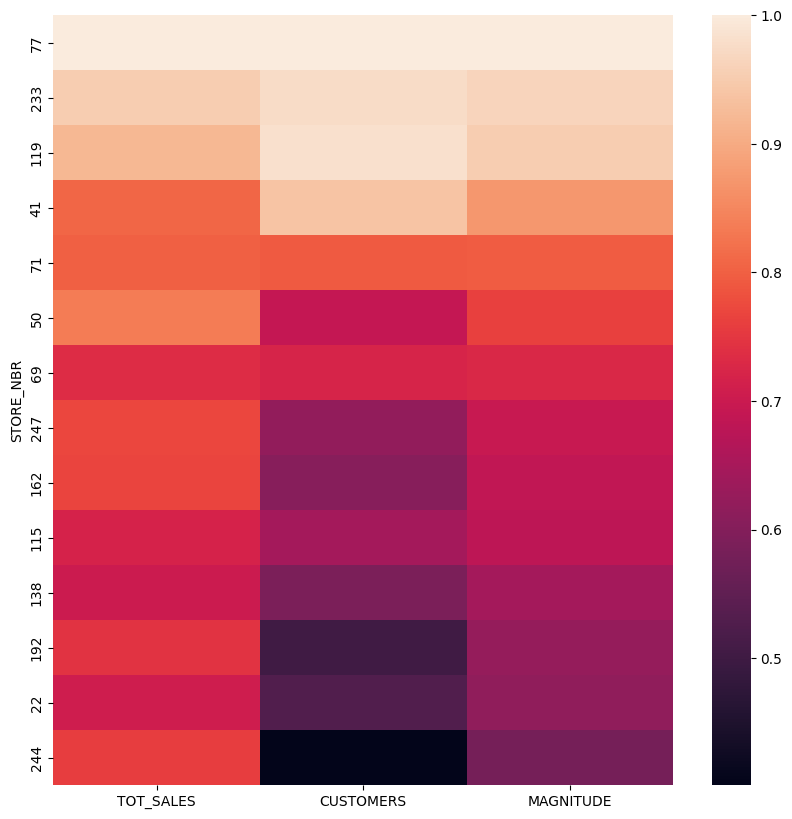

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(corr77[corr77.TOT_SALES.abs()>0.7])
plt.show()

Taking the store 233 into consideration plotting different measure against those of store 77

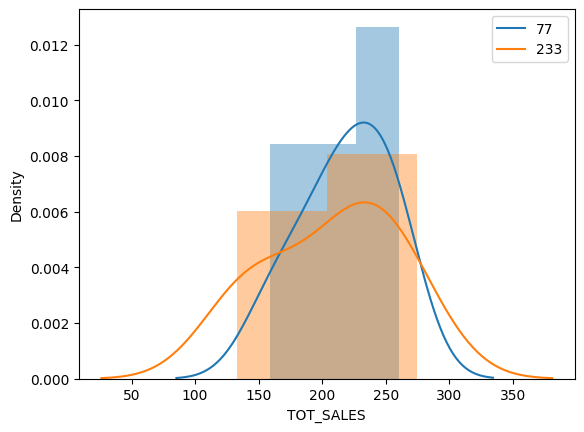

In [31]:
sns.distplot(metrics.loc[77]['TOT_SALES'])
sns.distplot(metrics.loc[233]['TOT_SALES'])
plt.legend(labels=['77','233'])
plt.show()

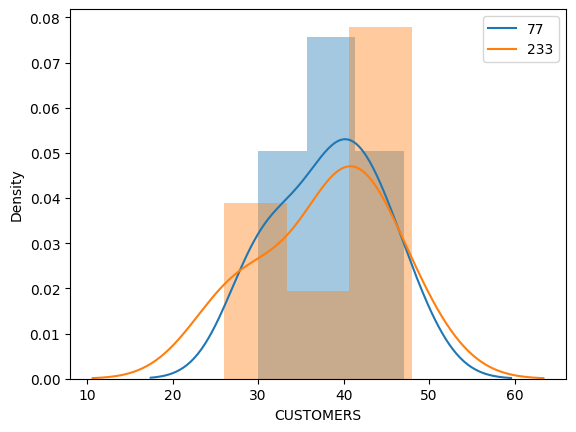

In [32]:
sns.distplot(metrics.loc[77]['CUSTOMERS'])
sns.distplot(metrics.loc[233]['CUSTOMERS'])
plt.legend(labels=['77','233'])
plt.show()

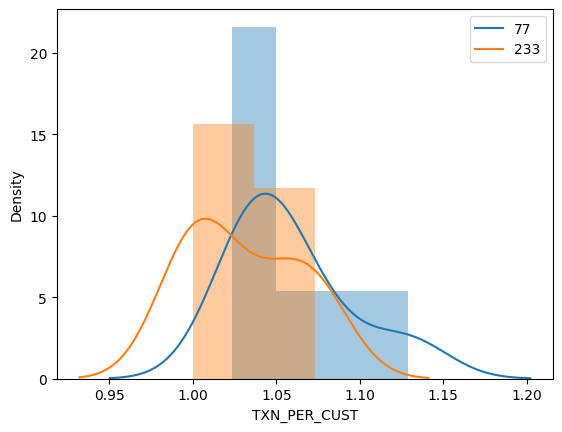

In [33]:
sns.distplot(metrics.loc[77]['TXN_PER_CUST'])
sns.distplot(metrics.loc[233]['TXN_PER_CUST'])
plt.legend(labels=['77','233'])
plt.show()

Since distributions of store 233 are similar to that of store 77, selecting store 233 as control store with max similarities to store 77.<br>
Calculating difference between scaled control sales and trial sales.<br>
Let null hypothesis be that both stores 77 ans 233 have no difference.

In [34]:
from scipy.stats import ks_2samp,ttest_ind,t

In [35]:
# difference between control and trial sales
a=[]
for x in metrics.columns:
    a.append(ks_2samp(metrics.loc[77][x], metrics.loc[233][x]))
a=pd.DataFrame(a,index=metrics.columns)

In [36]:
a

,statistic,pvalue
TOT_SALES,0.285714,0.962704
CUSTOMERS,0.142857,0.999961
PROD_QTY,0.285714,0.962704
PRICE_PER_UNIT,0.285714,0.962704
CHIP_PER_TXN,0.142857,0.999961
TXN_PER_CUST,0.571429,0.212121


For pre trial period, since all of the p-values are high (say more than 0.05), we can't reject the null hypothesis

#### Assessment of trial

The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.

Sampling march and april from the 3 months

In [37]:
b=[]
for x in trial.columns:
    b.append(ttest_ind(trial.loc[77][x].tail(2), trial.loc[233][x].tail(2)))
b=pd.DataFrame(b,index=metrics.columns)

In [38]:
b

,statistic,pvalue
TOT_SALES,3.116042,0.089395
CUSTOMERS,2.172858,0.161884
PROD_QTY,3.528039,0.071796
PRICE_PER_UNIT,-6.538103,0.022603
CHIP_PER_TXN,1.464692,0.280605
TXN_PER_CUST,-0.186360,0.869353


In [39]:
#critical value
t.ppf(0.95,df=7)

1.894578605061305

Since all of the p-values are high (say more than 0.05), we cannot reject the null hypothesis i.e. there means are significantly different.
We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

#### Vizualizing means

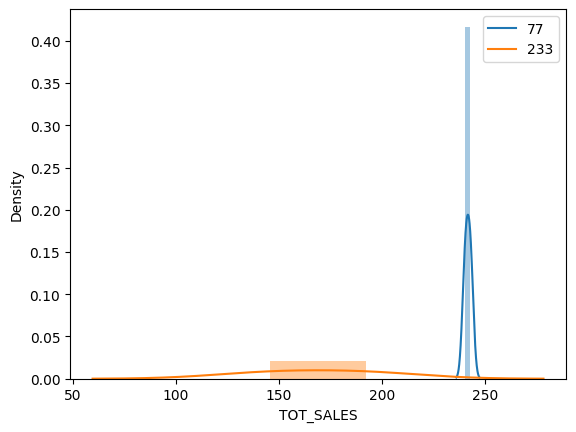

In [40]:
sns.distplot(trial.loc[77]['TOT_SALES'].tail(2))
sns.distplot(trial.loc[233]['TOT_SALES'].tail(2))
plt.legend(labels=['77','233'])
plt.show()

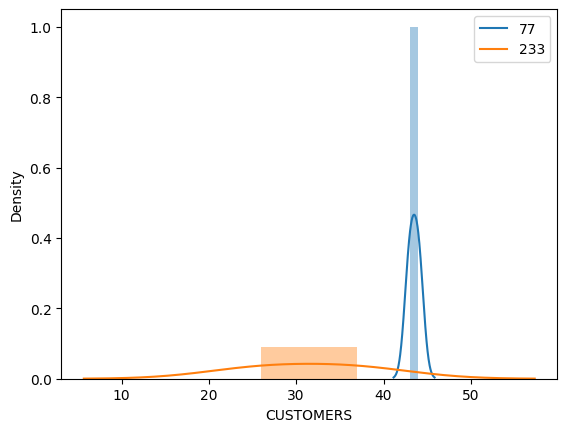

In [41]:
sns.distplot(trial.loc[77]['CUSTOMERS'].tail(2))
sns.distplot(trial.loc[233]['CUSTOMERS'].tail(2))
plt.legend(labels=['77','233'])
plt.show()

It can be visualized that there is a significant difference in the means, so trial store behavior(77) is different from control store (233).
The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

#### Store 86
Repeating same process for trial store 86

In [42]:
corr86=calcCorr(86)

In [43]:
corr86.head(3)

,TOT_SALES,CUSTOMERS
STORE_NBR,,
1,0.508577,0.419098
2,-0.378052,0.042997
3,-0.297446,-0.199731


In [44]:
corr86=standardizer(corr86)
corr86

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
1,0.508577,0.419098,0.463838
2,0.378052,0.042997,0.210525
3,0.297446,0.199731,0.248588
4,0.026932,0.449992,0.238462
5,0.682275,0.118613,0.400444
...,...,...,...
268,0.555339,0.282747,0.419043
269,0.667479,0.212980,0.440230
270,0.706177,0.806303,0.756240


In [45]:
corr86=corr86.sort_values(['MAGNITUDE'],ascending=False).dropna()
corr86

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
86,1.000000,1.000000,1.000000
27,0.812210,0.814481,0.813346
155,0.811839,0.807216,0.809528
138,0.824175,0.766814,0.795494
142,0.836040,0.751479,0.793760
...,...,...,...
81,0.083379,0.022385,0.052882
235,0.043386,0.017334,0.030360
219,0.054586,0.005853,0.030220


Above data shows that stores 155,27,138 are the most correlated to store 86.
#### Selecting 155 as control store as it has max correlation
#### Visualizing ...

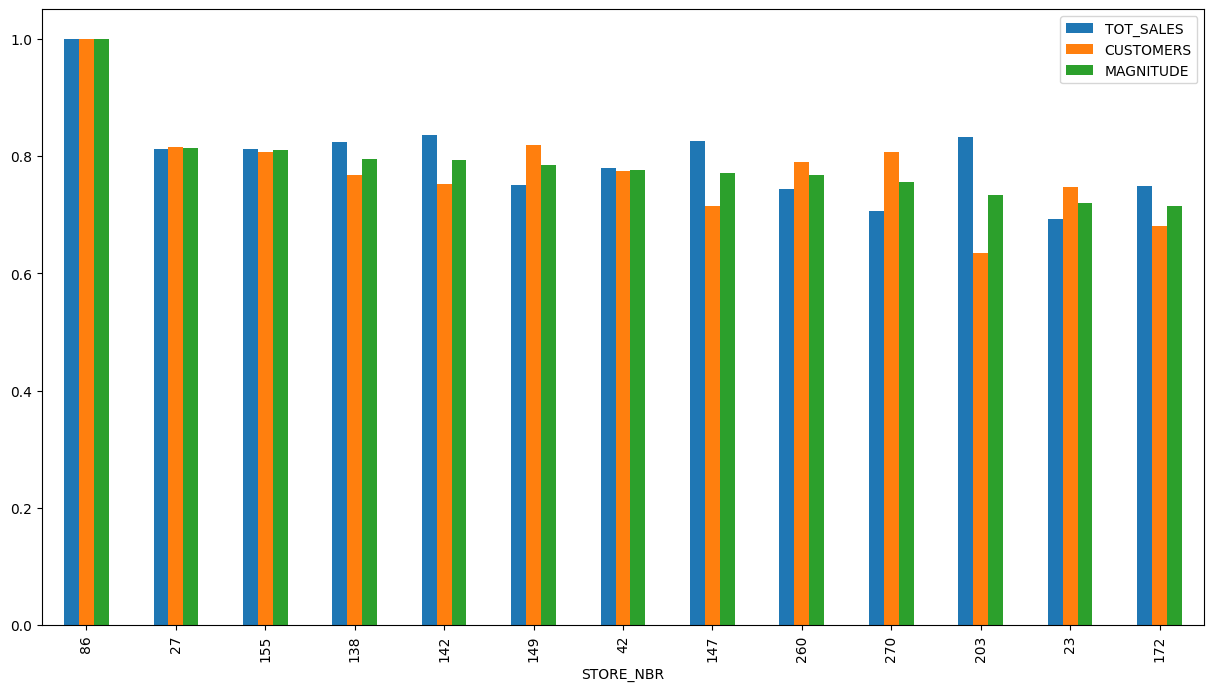

In [46]:
#Taking 0.7 as threshold corelation
corr86[(corr86.MAGNITUDE.abs()>0.7)].plot(kind='bar',figsize=(15,8))
plt.show()

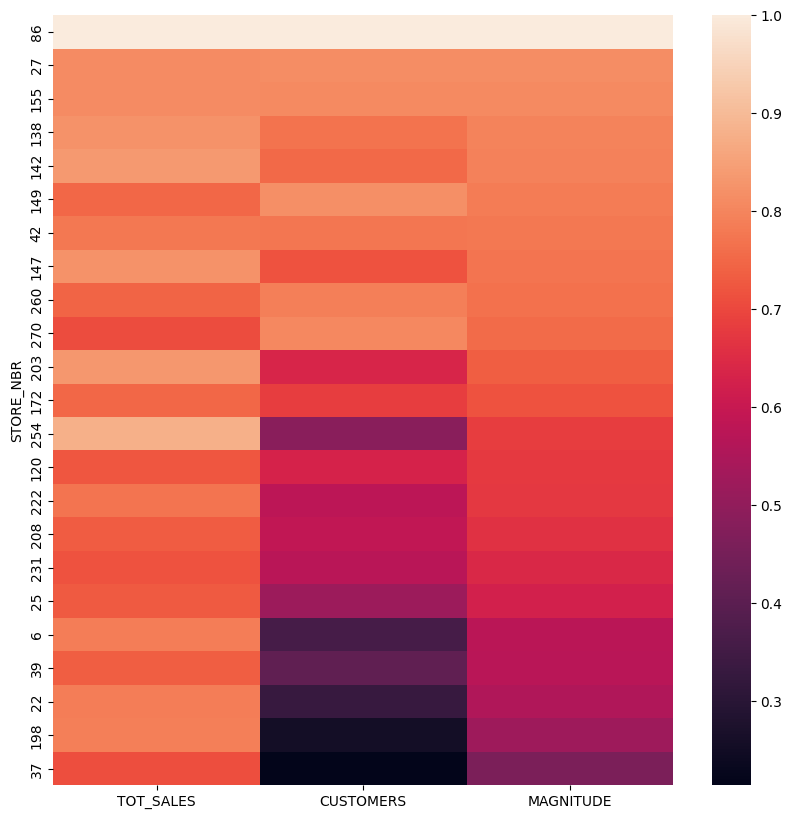

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(corr86[corr86.TOT_SALES.abs()>0.7])
plt.show()

Taking the store 155 into consideration plotting different measure against those of store 86

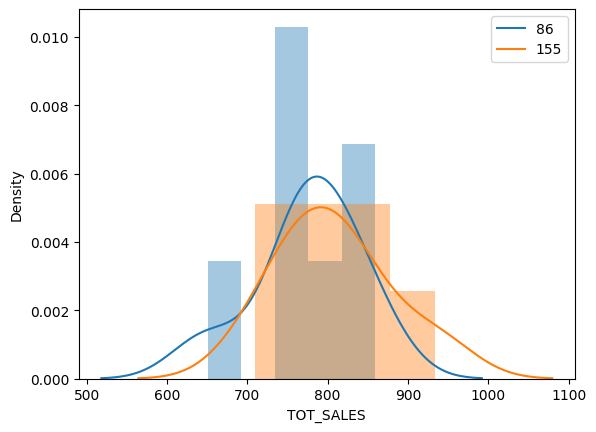

In [48]:
sns.distplot(metrics.loc[86]['TOT_SALES'])
sns.distplot(metrics.loc[155]['TOT_SALES'])
plt.legend(labels=['86','155'])
plt.show()


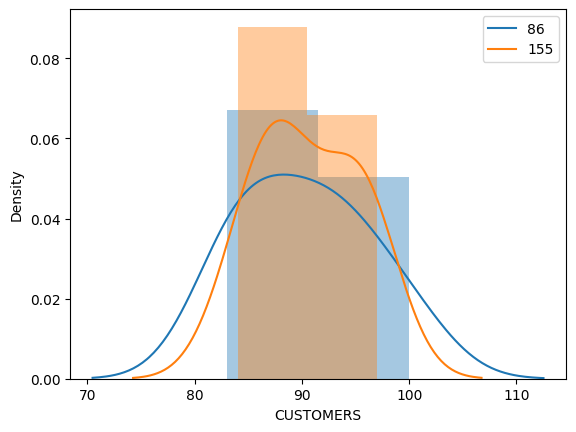

In [49]:
sns.distplot(metrics.loc[86]['CUSTOMERS'])
sns.distplot(metrics.loc[155]['CUSTOMERS'])
plt.legend(labels=['86','155'])
plt.show()

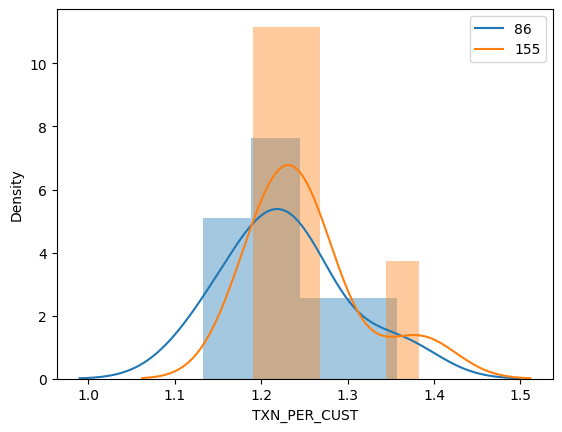

In [50]:
sns.distplot(metrics.loc[86]['TXN_PER_CUST'])
sns.distplot(metrics.loc[155]['TXN_PER_CUST'])
plt.legend(labels=['86','155'])
plt.show()

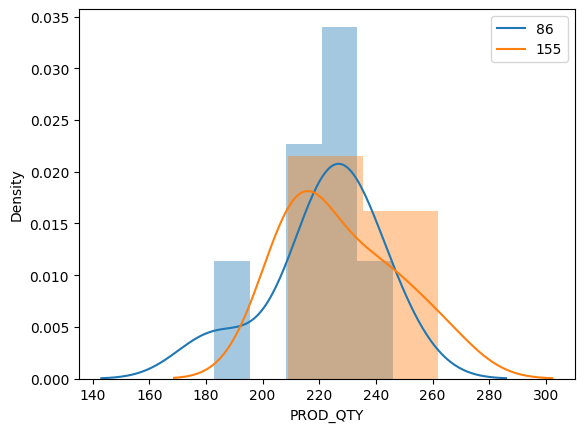

In [51]:
sns.distplot(metrics.loc[86]['PROD_QTY'])
sns.distplot(metrics.loc[155]['PROD_QTY'])
plt.legend(labels=['86','155'])
plt.show()

Since distributions of store 155 are similar to that of store 86, selecting store 155 as control store with max similarities to store 86.
#### Calculating difference between scaled control sales and trial sales
Let null hypothesis be that both stores 86 ans 155 have no difference

In [52]:
# difference between control and trial sales
a=[]
for x in metrics.columns:
    a.append(ks_2samp(metrics.loc[86][x], metrics.loc[155][x]))
a=pd.DataFrame(a,index=metrics.columns)

In [53]:
a

,statistic,pvalue
TOT_SALES,0.285714,0.962704
CUSTOMERS,0.142857,0.999961
PROD_QTY,0.285714,0.962704
PRICE_PER_UNIT,0.571429,0.212121
CHIP_PER_TXN,0.571429,0.212121
TXN_PER_CUST,0.285714,0.962704


For pre trial period, since p-values for TOT_SALES, CUSTOMERS and PROD_QTY are high (say more than 0.95), we can't reject the null hypothesis

#### Assessment of trial
The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.

In [54]:
b=[]
for x in trial.columns:
    b.append(ttest_ind(trial.loc[86][x].tail(2), trial.loc[155][x].tail(2)))
b=pd.DataFrame(b,index=metrics.columns)

In [55]:
b

,statistic,pvalue
TOT_SALES,2.219747,0.156622
CUSTOMERS,7.500000,0.017317
PROD_QTY,5.883484,0.027694
PRICE_PER_UNIT,0.376319,0.742851
CHIP_PER_TXN,0.746302,0.533285
TXN_PER_CUST,-5.173694,0.035388


In [56]:
#critical value
t.ppf(0.95,df=7)

1.894578605061305

Since all of the p-values are high (say more than 0.05), we cannot reject the null hypothesis i.e. there means are significantly different.
We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months.

#### Vizualizing means

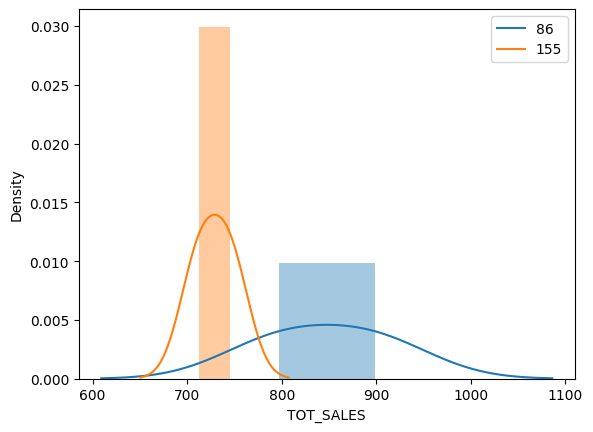

In [57]:
sns.distplot(trial.loc[86]['TOT_SALES'].tail(2))
sns.distplot(trial.loc[155]['TOT_SALES'].tail(2))
plt.legend(labels=['86','155'])
plt.show()

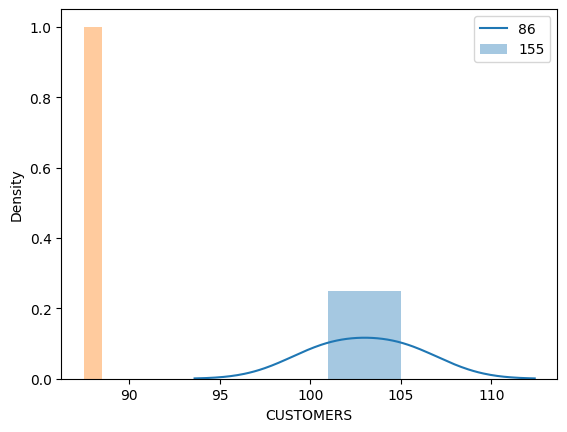

In [58]:
sns.distplot(trial.loc[86]['CUSTOMERS'].tail(2))
sns.distplot(trial.loc[155]['CUSTOMERS'].tail(2))
plt.legend(labels=['86','155'])
plt.show()

It can be visualized that the is a significant difference in the means, so trial store behavior(86) is different from control store (155).
It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasingthe number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.

#### Store 88
Finding stores corelated to store 88

In [59]:
corr88=calcCorr(88)

In [60]:
corr88.head(3)


,TOT_SALES,CUSTOMERS
STORE_NBR,,
1,0.778015,0.180416
2,0.424717,0.404368
3,-0.304894,0.248024


In [61]:
corr88=standardizer(corr88)
corr88

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
1,0.778015,0.180416,0.479215
2,0.424717,0.404368,0.414543
3,0.304894,0.248024,0.276459
4,0.576364,0.262566,0.419465
5,0.077361,0.243783,0.160572
...,...,...,...
268,0.256751,0.788450,0.522600
269,0.000827,0.130629,0.065728
270,0.853093,0.276441,0.564767


In [62]:
corr88=corr88.sort_values(['MAGNITUDE'],ascending=False).dropna()

In [63]:
corr88.head(15)

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
88,1.000000,1.000000,1.000000
209,0.849530,0.799049,0.824290
133,0.820968,0.807420,0.814194
14,0.822345,0.718070,0.770208
141,0.962808,0.552085,0.757446
123,0.651411,0.814849,0.733130
110,0.858523,0.567447,0.712985
214,0.714782,0.655630,0.685206
178,0.591228,0.778127,0.684678


Above data shows that stores 209,14,133 are the most correlated to store 88.

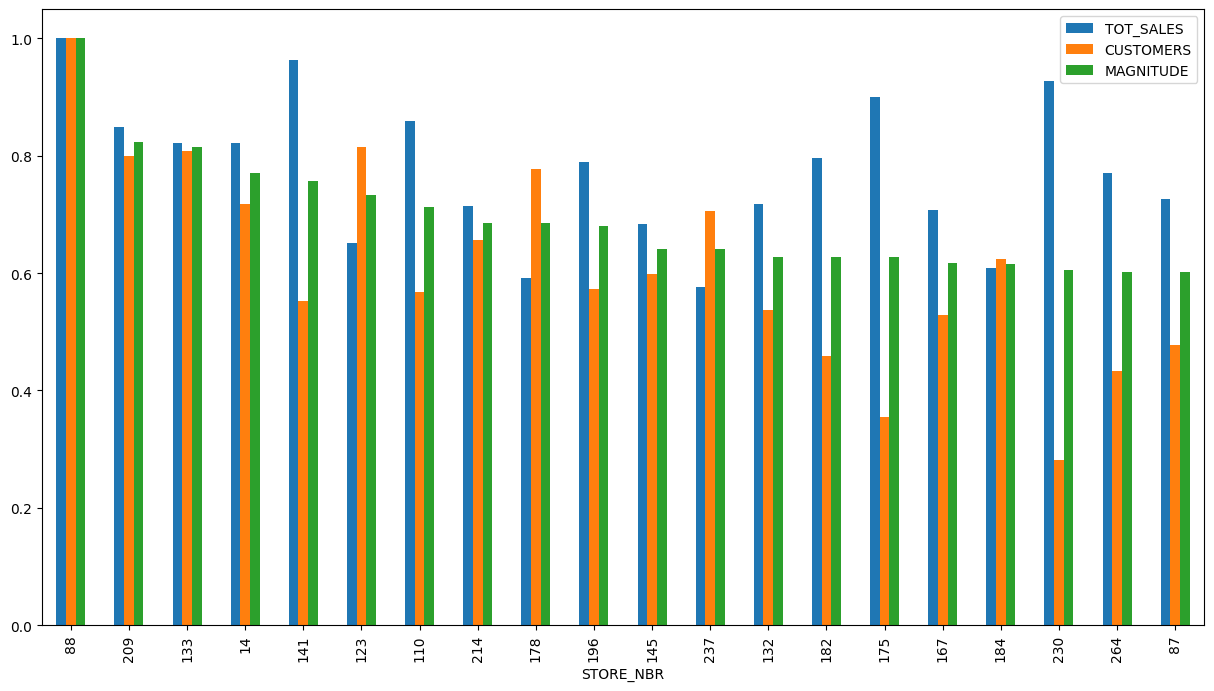

In [64]:
#Taking 0.6 as threshold corelation
corr88[(corr88.MAGNITUDE.abs()>0.6)].plot(kind='bar',figsize=(15,8))
plt.show()

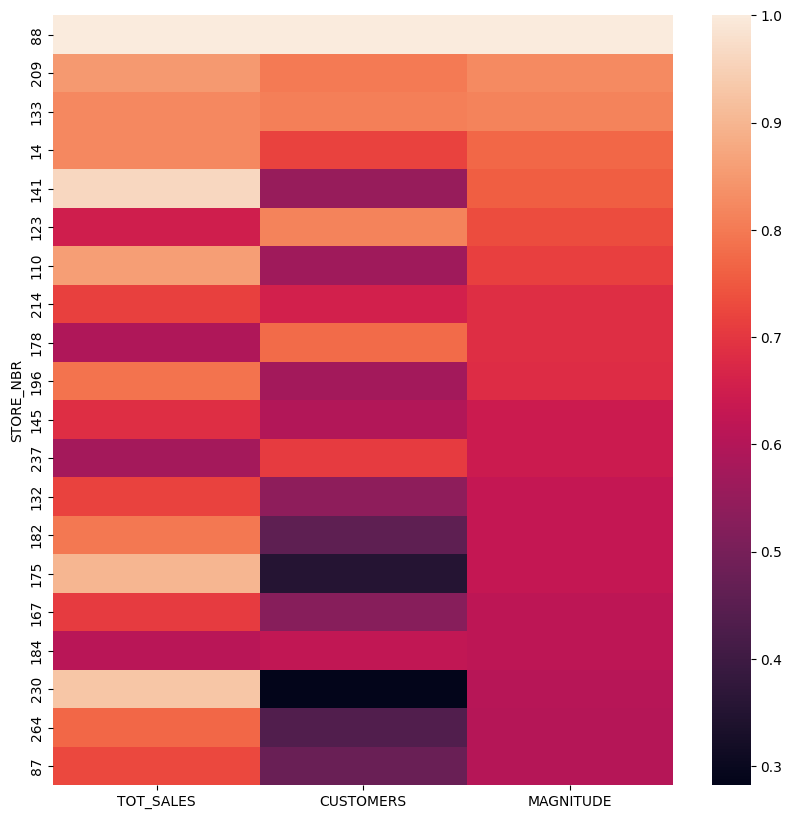

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(corr88[corr88.MAGNITUDE.abs()>0.6])
plt.show()

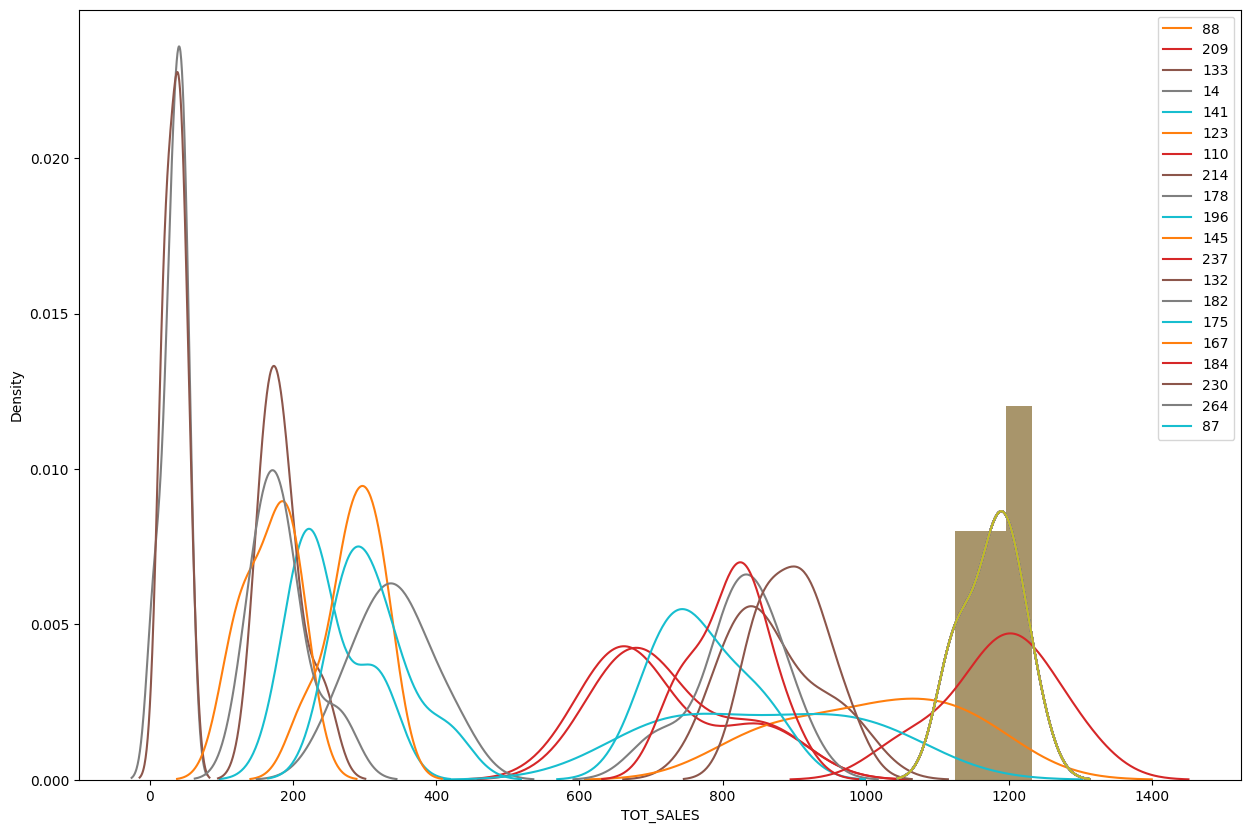

In [66]:
plt.figure(figsize=(15,10))
for x in corr88[corr88.MAGNITUDE.abs()>0.6].index:
    sns.distplot(metrics.loc[88]['TOT_SALES'])
    sns.distplot(metrics.loc[x]['TOT_SALES'],label=x,hist=False)
plt.legend()
plt.show()

#### Therefore Taking the store 237 into consideration plotting different measure against those of store 88

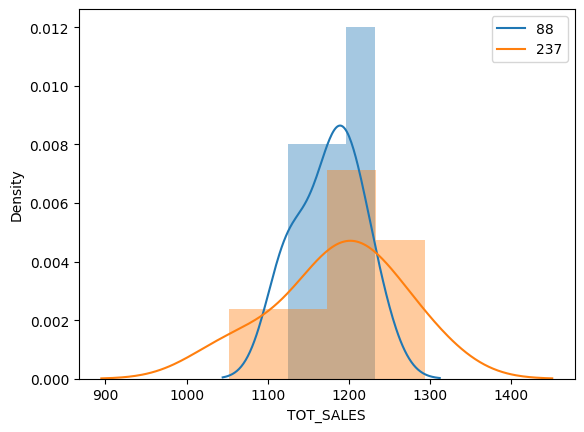

In [67]:
sns.distplot(metrics.loc[88]['TOT_SALES'])
sns.distplot(metrics.loc[237]['TOT_SALES'])
plt.legend(labels=['88','237'])
plt.show()

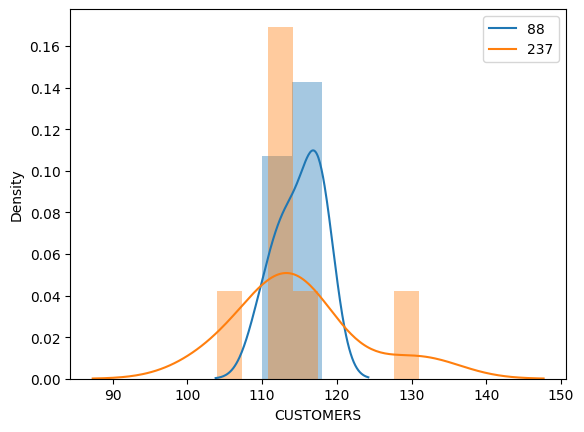

In [68]:
sns.distplot(metrics.loc[88]['CUSTOMERS'])
sns.distplot(metrics.loc[237]['CUSTOMERS'])
plt.legend(labels=['88','237'])
plt.show()

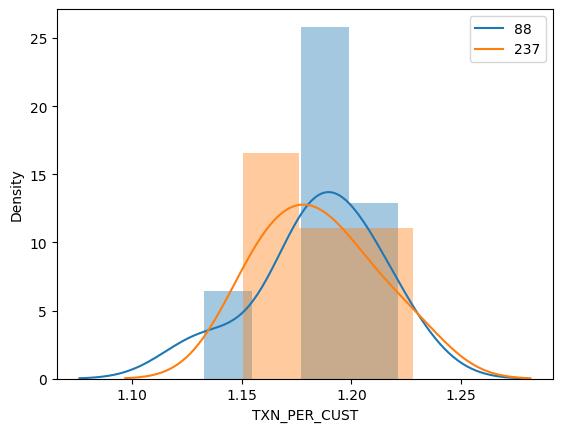

In [69]:
sns.distplot(metrics.loc[88]['TXN_PER_CUST'])
sns.distplot(metrics.loc[237]['TXN_PER_CUST'])
plt.legend(labels=['88','237'])
plt.show()

#### Since distributions of store 237 are similar to that of store 88, selecting store 237 as control store with max similarities to store 88

#### Calculating difference between scaled control sales and trial sales
Let null hypothesis be that both stores 88 ans 237 have no difference

In [70]:
# difference between control and trial sales
a=[]
for x in metrics.columns:
    a.append(ks_2samp(metrics.loc[88][x], metrics.loc[237][x]))
a=pd.DataFrame(a,index=metrics.columns)

In [71]:
a

,statistic,pvalue
TOT_SALES,0.285714,0.962704
CUSTOMERS,0.285714,0.962704
PROD_QTY,0.285714,0.962704
PRICE_PER_UNIT,0.428571,0.575175
CHIP_PER_TXN,0.285714,0.962704
TXN_PER_CUST,0.285714,0.962704


For pre trial period, since all of the p-values are high (say more than 0.05), we can't reject the null hypothesis
#### Assessment of trial
The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.

Sampling march and april from the 3 months

In [72]:
b=[]
for x in trial.columns:
    b.append(ttest_ind(trial.loc[86][x].tail(2), trial.loc[237][x].tail(2)))
b=pd.DataFrame(b,index=metrics.columns)

In [73]:
b

,statistic,pvalue
TOT_SALES,-3.407583,0.076384
CUSTOMERS,-0.200000,0.859972
PROD_QTY,1.371989,0.303689
PRICE_PER_UNIT,-6.498365,0.022871
CHIP_PER_TXN,-0.514638,0.658035
TXN_PER_CUST,5.728814,0.029144


Since all of the p-values are high (say more than 0.05), we cannot reject the null hypothesis i.e. there means are significantly different.

The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months.

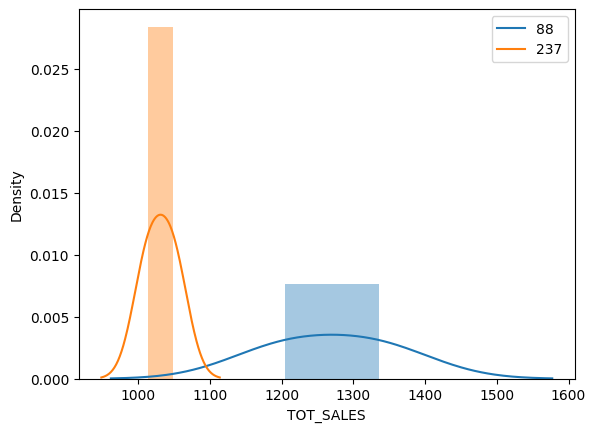

In [74]:
sns.distplot(trial.loc[88]['TOT_SALES'].tail(2))
sns.distplot(trial.loc[237]['TOT_SALES'].tail(2))
plt.legend(labels=['88','237'])
plt.show()

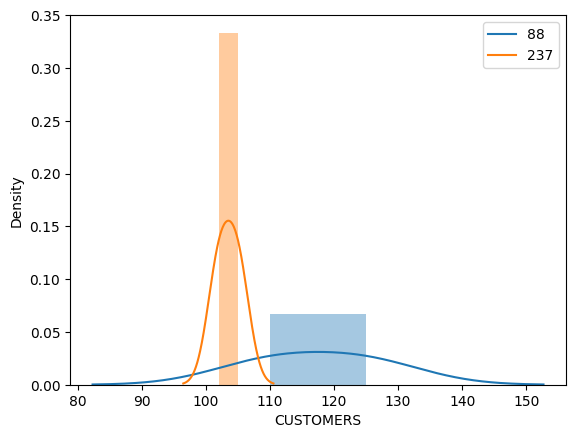

In [75]:
sns.distplot(trial.loc[88]['CUSTOMERS'].tail(2))
sns.distplot(trial.loc[237]['CUSTOMERS'].tail(2))
plt.legend(labels=['88','237'])
plt.show()

It can be visualized that the is a significant difference in the means, so trial store behavior(88) is different from control store (237).
Total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.

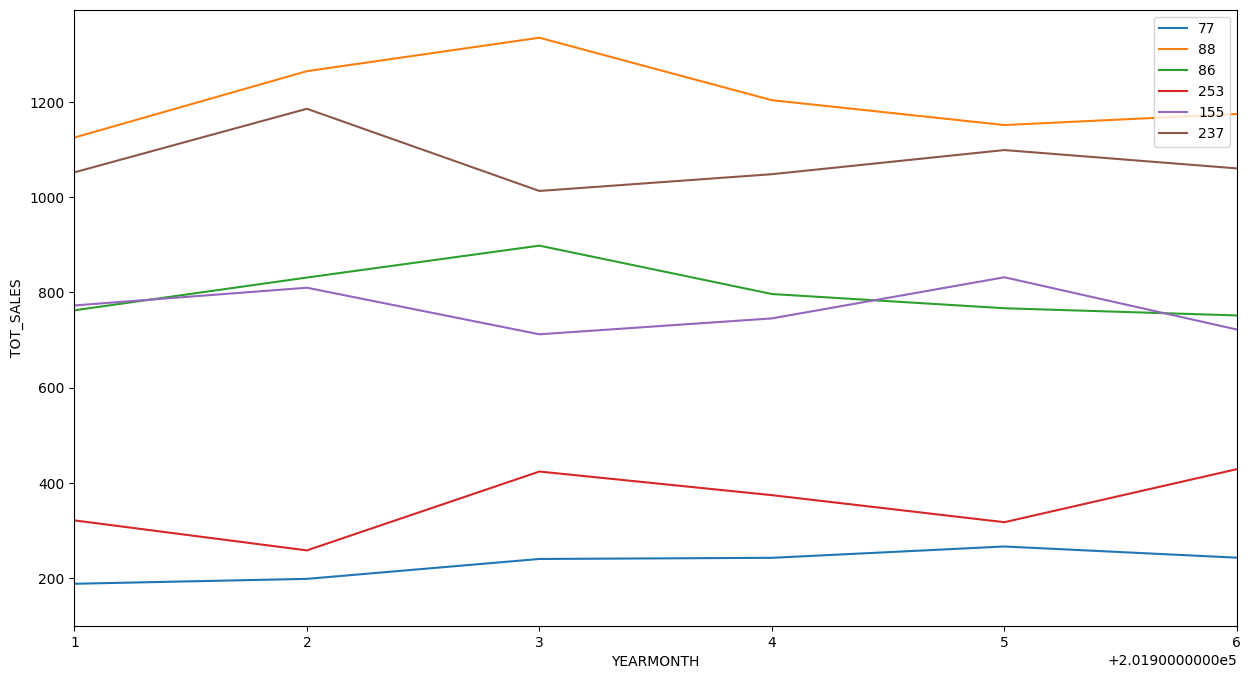

In [76]:
fig, ax = plt.subplots(figsize=(15, 8))
x=['77','88','86','253','155','237']
for i in  x:
    sns.lineplot(data=full.loc[int(i)],y='TOT_SALES',x=full.index.get_level_values(1).unique(),label=i)


#ax.set_xlim(201807,201812)
ax.set_xlim(201901,201906)
plt.show()

#### Conclusion
 - The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales.